In [12]:
!pip install holidays

You should consider upgrading via the '/Users/clovy/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [13]:
import numpy as np
import pandas as pd
import datetime as dt
import holidays
import warnings
warnings.filterwarnings('ignore')

In [173]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [174]:
#CHange the fs with con datasets to 2021-2022
fs_con = pd.read_csv('Flight Schedule w Concourse_2021.01-2022.11.csv')
fs_con.head()

,Flight Date,Flight Arrving Date Time,Flight Departing Date Time,Flight Date Time,Flight Arriving Time,Flight Departing Time,Date Hour Numeric,PA Time,Non-PA Time,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arriving from Airport Id,Departing to Airport Id,Dep Airport Code,Arr Airport Code,Context Airport Id,Non-Context Airport Id,State Id,Arr Terminal,Dep Terminal,Context Terminal,Flight Direction,Flight No,International Domestic,Mainline Low Cost,Service Type,Flight Type,Seats,Load Factor,Estimated Passenger,Flight Distance,Flight Duration,Valid Destination Indicator,Valid Carrier Indicator,Operating Airline Code,Operating Airline Name,TerminalId,Operating Airline Id,Flight Time,nonpaxratio,TSALoadFactor,Departure Concourse
0,1/1/2021,2021-01-01T06:15:00.000Z,2021-01-01T00:59:00.000Z,2021-01-01T00:59:00.000Z,1900-01-01T06:15:00.000Z,1900-01-01T00:59:00.000Z,2021010100,1900-01-01T00:59:00.000Z,1900-01-01T06:15:00.000Z,6397,32B,3750,NKS,316,116,EWR,SJU,116,316,59,NaN,B,B,Departure,1035,Domestic,NaN,J,All Passenger Flights,228,0.779561,177,1608,256,1,1,NK,Spirit Airlines,10,3750,1900-01-01T00:59:00.000Z,NaN,NaN,Concourse B-3
1,1/1/2021,2021-01-01T07:57:00.000Z,2021-01-01T06:00:00.000Z,2021-01-01T06:00:00.000Z,1900-01-01T07:57:00.000Z,1900-01-01T06:00:00.000Z,2021010106,1900-01-01T06:00:00.000Z,1900-01-01T07:57:00.000Z,6389,221,1486,DAL,107,116,EWR,DTW,116,107,23,EM,B,B,Departure,1646,Domestic,NaN,J,All Passenger Flights,109,0.779287,84,488,117,1,1,DL,Delta Air Lines,10,1486,1900-01-01T06:00:00.000Z,NaN,NaN,Concourse B-1
2,1/1/2021,2021-01-01T09:08:00.000Z,2021-01-01T06:00:00.000Z,2021-01-01T06:00:00.000Z,1900-01-01T09:08:00.000Z,1900-01-01T06:00:00.000Z,2021010106,1900-01-01T06:00:00.000Z,1900-01-01T09:08:00.000Z,6397,32B,3750,NKS,122,116,EWR,FLL,116,122,10,NaN,B,B,Departure,521,Domestic,NaN,J,All Passenger Flights,228,0.779561,177,1065,188,1,1,NK,Spirit Airlines,10,3750,1900-01-01T06:00:00.000Z,NaN,NaN,Concourse B-1
3,1/1/2021,2021-01-01T08:32:00.000Z,2021-01-01T06:15:00.000Z,2021-01-01T06:15:00.000Z,1900-01-01T08:32:00.000Z,1900-01-01T06:15:00.000Z,2021010106,1900-01-01T06:15:00.000Z,1900-01-01T08:32:00.000Z,6424,738,1486,DAL,25,116,EWR,ATL,116,25,11,S,B,B,Departure,2060,Domestic,NaN,J,All Passenger Flights,160,0.779287,124,746,137,1,1,DL,Delta Air Lines,10,1486,1900-01-01T06:15:00.000Z,NaN,NaN,Concourse B-1
4,1/1/2021,2021-01-01T10:05:00.000Z,2021-01-01T07:00:00.000Z,2021-01-01T07:00:00.000Z,1900-01-01T10:05:00.000Z,1900-01-01T07:00:00.000Z,2021010107,1900-01-01T07:00:00.000Z,1900-01-01T10:05:00.000Z,6396,32A,3750,NKS,295,116,EWR,RSW,116,295,10,NaN,B,B,Departure,1013,Domestic,NaN,J,All Passenger Flights,182,0.779561,141,1068,185,1,1,NK,Spirit Airlines,10,3750,1900-01-01T07:00:00.000Z,NaN,NaN,Concourse B-1


In [16]:
fs_con.shape

(50786, 44)

In [17]:
fs_con.dtypes

Flight Date                     object
Flight Arrving Date Time        object
Flight Departing Date Time      object
Flight Date Time                object
Flight Arriving Time            object
Flight Departing Time           object
Date Hour Numeric                int64
PA Time                         object
Non-PA Time                     object
Aircraft Id                      int64
Aircraft Code                   object
Airline Id                       int64
ICAO Airline                    object
Arriving from Airport Id         int64
Departing to Airport Id          int64
Dep Airport Code                object
Arr Airport Code                object
Context Airport Id               int64
Non-Context Airport Id           int64
State Id                         int64
Arr Terminal                    object
Dep Terminal                    object
Context Terminal                object
Flight Direction                object
Flight No                        int64
International Domestic   

In [175]:
#filter for B concourses
fs = fs_con[fs_con['Departure Concourse'].isin(['Concourse B-1', 'Concourse B-2','Concourse B-3'])]

In [176]:
#remove the load factor columns - these were not merged properly in the original dataset
fs = fs.drop(['Load Factor',	'Estimated Passenger','nonpaxratio','TSALoadFactor'],axis=1)

In [177]:
fs['Flight Type'].value_counts()

All Passenger Flights    48222
Name: Flight Type, dtype: int64

In [178]:
fs = fs.replace({'Departure Concourse':{'Concourse B-1':'B1','Concourse B-2':'B2','Concourse B-3':'B3'}})

In [179]:
start, stop = 0, 10

fs['Date'] = fs['Flight Departing Date Time'].str.slice(start, stop)

In [180]:
start, stop = 11, 16

fs['Time'] = fs['Flight Departing Date Time'].str.slice(start, stop)

In [181]:
fs['DT_sched'] = fs['Date']+' '+fs['Time'].astype(str)
fs['DT_sched'] = pd.to_datetime(fs['DT_sched'], format='%Y-%m-%d %H:%M:%S')

In [182]:
fs['date'] = fs['DT_sched'].dt.date
fs['Hour'] = fs['DT_sched'].dt.hour

In [183]:
fs.columns

Index(['Flight Date', 'Flight Arrving Date Time', 'Flight Departing Date Time',
       'Flight Date Time', 'Flight Arriving Time', 'Flight Departing Time',
       'Date Hour Numeric', 'PA Time', 'Non-PA Time', 'Aircraft Id',
       'Aircraft Code', 'Airline Id', 'ICAO Airline',
       'Arriving from Airport Id', 'Departing to Airport Id',
       'Dep Airport Code', 'Arr Airport Code', 'Context Airport Id',
       'Non-Context Airport Id', 'State Id', 'Arr Terminal', 'Dep Terminal',
       'Context Terminal', 'Flight Direction', 'Flight No',
       'International Domestic', 'Mainline Low Cost', 'Service Type',
       'Flight Type', 'Seats', 'Flight Distance', 'Flight Duration',
       'Valid Destination Indicator', 'Valid Carrier Indicator',
       'Operating Airline Code', 'Operating Airline Name', 'TerminalId',
       'Operating Airline Id', 'Flight Time', 'Departure Concourse', 'Date',
       'Time', 'DT_sched', 'date', 'Hour'],
      dtype='object')

In [27]:
#I took out ID since we don't have the id columns here_Alex

In [184]:
fs = fs[['Aircraft Id', 'Aircraft Code', 'Airline Id',
       'ICAO Airline', 'Arr Airport Code', 'Dep Terminal',
       'Flight No',
       'International Domestic', 
       'Flight Distance', 'Flight Duration', 'Operating Airline Code',
       'Operating Airline Name', 'Operating Airline Id',
       'Flight Time', 'Departure Concourse',
       'Date', 'date','Time', 'DT_sched', 'Hour', 'Seats']]

In [29]:
fs.head()

,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats
0,6397,32B,3750,NKS,SJU,B,1035,Domestic,1608,256,NK,Spirit Airlines,3750,1900-01-01T00:59:00.000Z,B3,2021-01-01,2021-01-01,00:59,2021-01-01 00:59:00,0,228
1,6389,221,1486,DAL,DTW,B,1646,Domestic,488,117,DL,Delta Air Lines,1486,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,109
2,6397,32B,3750,NKS,FLL,B,521,Domestic,1065,188,NK,Spirit Airlines,3750,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,228
3,6424,738,1486,DAL,ATL,B,2060,Domestic,746,137,DL,Delta Air Lines,1486,1900-01-01T06:15:00.000Z,B1,2021-01-01,2021-01-01,06:15,2021-01-01 06:15:00,6,160
4,6396,32A,3750,NKS,RSW,B,1013,Domestic,1068,185,NK,Spirit Airlines,3750,1900-01-01T07:00:00.000Z,B1,2021-01-01,2021-01-01,07:00,2021-01-01 07:00:00,7,182


In [185]:
fs['month'] = fs['DT_sched'].dt.month
fs['year'] = fs['DT_sched'].dt.year

In [31]:
#filter for 2022 only
#fs = fs[fs.year == 2022]
#We use both 2021 and 2022

## Group flight times into time of day and day of week

In [186]:
morning = [6,7,8,9,10,11,12]
afternoon = [13,14,15,16,17]
evening = [18,19,20,21,22]
overnight = [23,0,1,2,3,4,5]

In [187]:
lsthour = []
for s in fs['Hour']:
        if s in morning:
            lsthour.append('Morning')
        elif s in afternoon:
            lsthour.append('Afternoon')
        elif s in evening:
            lsthour.append('Evening')
        elif s in overnight:
            lsthour.append('Overnight')

In [188]:
fs['Time Category'] = lsthour

In [189]:
fs['DOW'] = fs['DT_sched'].dt.weekday
fs['DOW_l'] = fs['DOW'].copy()
fs["DOW_l"].replace({0: "Monday", 1: "Tuesday",2:"Wednesday",3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}, inplace=True)

In [190]:
fs.head()

,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats,month,year,Time Category,DOW,DOW_l
0,6397,32B,3750,NKS,SJU,B,1035,Domestic,1608,256,NK,Spirit Airlines,3750,1900-01-01T00:59:00.000Z,B3,2021-01-01,2021-01-01,00:59,2021-01-01 00:59:00,0,228,1,2021,Overnight,4,Friday
1,6389,221,1486,DAL,DTW,B,1646,Domestic,488,117,DL,Delta Air Lines,1486,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,109,1,2021,Morning,4,Friday
2,6397,32B,3750,NKS,FLL,B,521,Domestic,1065,188,NK,Spirit Airlines,3750,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,228,1,2021,Morning,4,Friday
3,6424,738,1486,DAL,ATL,B,2060,Domestic,746,137,DL,Delta Air Lines,1486,1900-01-01T06:15:00.000Z,B1,2021-01-01,2021-01-01,06:15,2021-01-01 06:15:00,6,160,1,2021,Morning,4,Friday
4,6396,32A,3750,NKS,RSW,B,1013,Domestic,1068,185,NK,Spirit Airlines,3750,1900-01-01T07:00:00.000Z,B1,2021-01-01,2021-01-01,07:00,2021-01-01 07:00:00,7,182,1,2021,Morning,4,Friday


## Add new column for Holidays and holiday weekends

In [191]:
#import US holidays (for NY and NJ) from the holidays library
hds = holidays.US(subdiv = 'NY',years = [2021,2022]) + holidays.US(subdiv = 'NJ',years = [2021,2022])

In [192]:
for date, name in sorted(hds.items()):
    print(date, name, date.weekday())

2021-01-01 New Year's Day 4
2021-01-18 Martin Luther King Jr. Day 0
2021-02-12 Lincoln's Birthday 4
2021-02-15 Washington's Birthday 0
2021-04-02 Good Friday 4
2021-05-31 Memorial Day 0
2021-06-18 Juneteenth National Independence Day (Observed) 4
2021-06-19 Juneteenth National Independence Day 5
2021-07-04 Independence Day 6
2021-07-05 Independence Day (Observed) 0
2021-09-06 Labor Day 0
2021-10-11 Columbus Day 0
2021-11-02 Election Day 1
2021-11-11 Veterans Day 3
2021-11-25 Thanksgiving 3
2021-12-24 Christmas Day (Observed) 4
2021-12-25 Christmas Day 5
2021-12-31 New Year's Day (Observed) 4
2022-01-01 New Year's Day 5
2022-01-17 Martin Luther King Jr. Day 0
2022-02-11 Lincoln's Birthday (Observed) 4
2022-02-12 Lincoln's Birthday 5
2022-02-15 Susan B. Anthony Day 1
2022-02-21 Washington's Birthday 0
2022-04-15 Good Friday 4
2022-05-30 Memorial Day 0
2022-06-19 Juneteenth National Independence Day 6
2022-06-20 Juneteenth National Independence Day (Observed) 0
2022-07-04 Independence Day

In [193]:
#days surrounding the holidays also tend to have higher demand. Identify the surrounding days.
fl_hds = []
for date, name in sorted(hds.items()):
    if (name == 'Christmas Day') | (name == 'Thanksgiving') | (name == "New Year's Day"):
    # for the big holidays, we would expect to see increased travel on the 3 days before and after
        fl_hds.append(date - dt.timedelta(1))
        fl_hds.append(date - dt.timedelta(2))
        fl_hds.append(date - dt.timedelta(3))
        fl_hds.append(date + dt.timedelta(1))
        fl_hds.append(date + dt.timedelta(2))
        fl_hds.append(date + dt.timedelta(3))
    elif date.weekday() == 0:
    # for Monday holidays, we would expect to see increased travel on the Friday, Saturday, and Sunday prior
        fl_hds.append(date - dt.timedelta(1))
        fl_hds.append(date - dt.timedelta(2))
        fl_hds.append(date - dt.timedelta(3))
    elif date.weekday() == 4:
    # for Friday holidays, we would expect to see increased travel on the Saturday and Sunday after
        fl_hds.append(date + dt.timedelta(1))
        fl_hds.append(date + dt.timedelta(2))
    

In [194]:
#if the departure date is in the list of holidays, mark as a 1 or if the departure date is in the list of days surrounding holidays, also mark as a 1
fs['holiday'] = 0
for i in fs.index:
    if fs.loc[i,'DT_sched'] in hds:
        fs.loc[i,'holiday'] = 1
    elif fs.loc[i,'DT_sched'].date() in fl_hds:
        fs.loc[i,'holiday'] = 1

In [195]:
#export to csv a list of 2021 and 2022 holidays
for h in fl_hds:
    if (h not in hds.keys()) & (h.year >=2021):
        hds.append({h:"Holiday Weekend"})

In [196]:
hdays = pd.DataFrame(hds.items(), columns = ['date','holiday'])
hdays['date'] = pd.to_datetime(hdays['date'])
hdays = hdays.sort_values('date').reset_index(drop=True)
hdays['dow'] = hdays['date'].dt.dayofweek
hdays.head()

,date,holiday,dow
0,2021-01-01,New Year's Day,4
1,2021-01-02,Holiday Weekend,5
2,2021-01-03,Holiday Weekend,6
3,2021-01-04,Holiday Weekend,0
4,2021-01-15,Holiday Weekend,4


In [43]:
#hdays.to_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\PANYNJ-codebase\LookupTables\holidays2021-22.csv')

## Merge aircraft codes for ICAO and BTS

In [197]:
# I had to create this lookup table manually, referring to the following sources:
# 1) the T-100 data itself, which has the Aircraft Type Desc_1
# 2) the BTS website provides this lookup table for BTS Aircraft Type Desc_2 and the BTS Aircraft Type Code: https://transtats.bts.gov/Download_Lookup.asp?Y11x72=Y_NVePeNSg_glcR
# 3) https://en.wikipedia.org/wiki/List_of_aircraft_type_designators
# 4) https://www.avcodes.co.uk/acrtypes.asp
# 5) The FAA Airplane Design Groups (ADG), which is used to classify plane size based on wingspan and height. It is a good enough approximation for seat capacity categories. https://www.faa.gov/airports/engineering/aircraft_char_database/
# Note that there is not always a 1-to-1 match, and a few of the BTS values did not correspond perfectly with the ICAO/IATA codes.
aircraft_codes = pd.read_csv('Aircraft_Lookup.csv')
aircraft_codes.head()

,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG
0,AIRBUS INDUSTRIE A220-100,Airbus Industrie A330-300,687,BCS1,221,III
1,AIRBUS INDUSTRIE A220-300,A220-300 BD-500-1A11,724,BCS3,223,III
2,AIRBUS INDUSTRIE A300-600/R/CF/RCF,Airbus Industrie A300-600/R/CF/RCF,691,A306,AB6,IV
3,AIRBUS INDUSTRIE A300-B2,Airbus Industrie A300-B2,695,A30B,AB4,IV
4,AIRBUS INDUSTRIE A319,Airbus Industrie A319,698,A319,319,III


In [198]:
fs = pd.merge(left=fs, right=aircraft_codes,how='left',left_on='Aircraft Code', right_on = 'IATA Aircraft Code')
fs.head()

,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG
0,6397,32B,3750,NKS,SJU,B,1035,Domestic,1608,256,NK,Spirit Airlines,3750,1900-01-01T00:59:00.000Z,B3,2021-01-01,2021-01-01,00:59,2021-01-01 00:59:00,0,228,1,2021,Overnight,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,32B,III
1,6389,221,1486,DAL,DTW,B,1646,Domestic,488,117,DL,Delta Air Lines,1486,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,109,1,2021,Morning,4,Friday,1,AIRBUS INDUSTRIE A220-100,Airbus Industrie A330-300,687,BCS1,221,III
2,6397,32B,3750,NKS,FLL,B,521,Domestic,1065,188,NK,Spirit Airlines,3750,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,228,1,2021,Morning,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,32B,III
3,6424,738,1486,DAL,ATL,B,2060,Domestic,746,137,DL,Delta Air Lines,1486,1900-01-01T06:15:00.000Z,B1,2021-01-01,2021-01-01,06:15,2021-01-01 06:15:00,6,160,1,2021,Morning,4,Friday,1,BOEING 737-800,Boeing 737-800,614,B738,738,III
4,6424,738,1486,DAL,ATL,B,2060,Domestic,746,137,DL,Delta Air Lines,1486,1900-01-01T06:15:00.000Z,B1,2021-01-01,2021-01-01,06:15,2021-01-01 06:15:00,6,160,1,2021,Morning,4,Friday,1,BOEING 737-900,Boeing 737-900,634,B738,738,III


In [199]:
# merge worked well - no N/As
#There are 14713 N/As in the merging-Alex
fs['BTS Aircraft Type Code'].isna().sum()

14713

## Merge destination region

In [200]:
# the destination data is available at https://ourairports.com/data/
# the regions were manually assigned based on Gabe's discretion. Domestic flights are divided into northeast, southeast, midwest, plains, and west coast/pacific.
# Canada is its own region. Central America and Caribbean were grouped together with South America. Otherwise, the region corresponds to the continent.

airport_lookup = pd.read_csv('airport-codes.csv')
airport_lookup.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates,US State,US Region,Region
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125",PA,Northeast,USA-Northeast
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022",KS,Plains,USA-Plains
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968",AK,Pacific West,USA-Pacific West
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172",AL,Southeast,USA-Southeast
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087",AR,Southeast,USA-Southeast


In [201]:
fs = pd.merge(fs, airport_lookup[['iata_code','Region']],left_on = 'Arr Airport Code',right_on = 'iata_code', how='left')

## Merge airline category

In [202]:
# Airlines were grouped into low-cost carriers (LC) and traditional carriers (TR)
# the data source for this classification is based on the ICAO List of Low-Cost-Carriers: https://www.icao.int/sustainability/documents/lcc-list.pdf
# A few manual adjustments were made for known LCCs, e.g. French Bee, that is not in the ICAO list.

al_lookup = pd.read_csv('Airlines Mapping.csv')
al_lookup.head()

,Marketing Airline Desc,Marketing Airline IATA Code,Marketing Airline ICAO Code,Marketing Airline Country,Type
0,ABC Aerolineas,4O,AIJ,Mexico,LC
1,Aer Lingus,EI,EIN,Ireland,TR
2,Aeroenlaces Nacionales,VB,VIV,Mexico,LC
3,Aeroflot Russian Airlines,SU,AFL,Russia,TR
4,Aerolineas Argentinas,AR,ARG,Argentina,TR


In [203]:
fs = pd.merge(fs, al_lookup[['Marketing Airline IATA Code','Marketing Airline ICAO Code','Type']], how= 'left', left_on = 'ICAO Airline', right_on = 'Marketing Airline ICAO Code').rename({'Marketing Airline IATA Code':'airline_iata','Type':'airline_type','Marketing Airline ICAO Code':'airline_icao'},axis=1)

In [204]:
fs.head()

,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG,iata_code,Region,airline_iata,airline_icao,airline_type
0,6397,32B,3750,NKS,SJU,B,1035,Domestic,1608,256,NK,Spirit Airlines,3750,1900-01-01T00:59:00.000Z,B3,2021-01-01,2021-01-01,00:59,2021-01-01 00:59:00,0,228,1,2021,Overnight,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,32B,III,SJU,Latin America & Caribbean,NK,NKS,LC
1,6389,221,1486,DAL,DTW,B,1646,Domestic,488,117,DL,Delta Air Lines,1486,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,109,1,2021,Morning,4,Friday,1,AIRBUS INDUSTRIE A220-100,Airbus Industrie A330-300,687,BCS1,221,III,DTW,USA-Midwest,DL,DAL,TR
2,6397,32B,3750,NKS,FLL,B,521,Domestic,1065,188,NK,Spirit Airlines,3750,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,228,1,2021,Morning,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,32B,III,FLL,USA-Southeast,NK,NKS,LC
3,6424,738,1486,DAL,ATL,B,2060,Domestic,746,137,DL,Delta Air Lines,1486,1900-01-01T06:15:00.000Z,B1,2021-01-01,2021-01-01,06:15,2021-01-01 06:15:00,6,160,1,2021,Morning,4,Friday,1,BOEING 737-800,Boeing 737-800,614,B738,738,III,ATL,USA-Southeast,DL,DAL,TR
4,6424,738,1486,DAL,ATL,B,2060,Domestic,746,137,DL,Delta Air Lines,1486,1900-01-01T06:15:00.000Z,B1,2021-01-01,2021-01-01,06:15,2021-01-01 06:15:00,6,160,1,2021,Morning,4,Friday,1,BOEING 737-900,Boeing 737-900,634,B738,738,III,ATL,USA-Southeast,DL,DAL,TR


## Merge Daily Vaccination Data

In [52]:
#Changed to read excel

In [205]:
vax = pd.read_excel('CDC Vaccine Daily.xlsx',skipfooter=3)
vax.head()

,date,Total Administered Doses,Total Completed Vaccinations
0,2020-12-13,0,0
1,2020-12-14,509,0
2,2020-12-15,12129,0
3,2020-12-16,38996,0
4,2020-12-17,75708,0


In [206]:
vax.date = pd.to_datetime(vax.date).dt.date

In [207]:
vax.sort_values(by='date',inplace=True)
vax['total_doses'] = vax['Total Administered Doses'].cumsum()

In [208]:
fs = pd.merge(fs, vax[['date','total_doses']], how= 'left', left_on = 'date', right_on = 'date')

## T-100 data download from BTS portal

In [233]:
#downloaded from https://transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FMG&QO_fu146_anzr=Nv4+Pn44vr45
#Re-Downloaded using the link above
#Use Gabe's link in the whats app
#2021 + 2022
t2021 = pd.read_csv('2021.csv')
t2022 = pd.read_csv('2022.csv')


In [234]:
# filter for Newark departures only
#Number of data significantly decreases-Alex
t2021 = t2021[t2021['ORIGIN'] == 'EWR']

t2021.shape

(7128, 50)

In [235]:
t2022 = t2022[t2022['ORIGIN'] == 'EWR']

t2022.shape

(724, 50)

In [236]:
#Concat data 2021 and 2022
t1 = pd.concat([t2021,t2022])

t1.shape

(7852, 50)

In [237]:

t1.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE
1,0.0,1.0,42176.0,166.0,148.0,414.0,94.0,628.0,116.0,99.0,UA,19977,United Air Lines Inc.,0A875,D,UA,United Air Lines Inc.,3,3,11618,1161802,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,US,United States,21,10994,1099402,30994,CHS,"Charleston, SC",SC,45.0,South Carolina,US,United States,37,6,614,1,2021,1,3,2,F,DU
6,0.0,1.0,41984.0,169.0,135.0,0.0,0.0,1817.0,403.0,345.0,UA,19977,United Air Lines Inc.,0A875,D,UA,United Air Lines Inc.,3,3,11618,1161802,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,US,United States,21,11921,1192102,31921,GJT,"Grand Junction, CO",CO,8.0,Colorado,US,United States,82,6,622,1,2021,1,3,4,F,DU
24,0.0,1.0,33461.0,166.0,37.0,3000.0,0.0,645.0,106.0,89.0,UA,19977,United Air Lines Inc.,0A875,D,UA,United Air Lines Inc.,3,3,11618,1161802,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,US,United States,21,12339,1233904,32337,IND,"Indianapolis, IN",IN,18.0,Indiana,US,United States,42,6,614,1,2021,1,3,2,L,DU
62,0.0,1.0,124180.0,0.0,0.0,54716.0,0.0,2454.0,361.0,325.0,UA,19977,United Air Lines Inc.,0A875,D,UA,United Air Lines Inc.,3,3,11618,1161802,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,US,United States,21,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6.0,California,US,United States,91,6,889,1,2021,1,3,5,P,DU
63,0.0,1.0,95546.0,0.0,0.0,42825.0,0.0,2565.0,341.0,317.0,UA,19977,United Air Lines Inc.,0A875,D,UA,United Air Lines Inc.,3,3,11618,1161802,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,US,United States,21,14771,1477104,32457,SFO,"San Francisco, CA",CA,6.0,California,US,United States,91,6,889,1,2021,1,3,6,P,DU


In [238]:
t1.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'DEST_WAC', 'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG',
       'YEAR', 'QUARTER', 'MONTH', 'DISTANCE_GROUP', 'CLASS', 'DATA_SOURCE'],
      dtype='object')

In [239]:
# filter out freight-only flights, flights with fewer than 10 seats or 10 passengers - these are more likely to be reporting errors/outliers than actual, very small flights (which won't have a huge impact anyway)

#AIRCRAFT_CONFIG refers to cargo/passengers. Passenger flights have config == 1 or 3
t1 = t1[(t1.AIRCRAFT_CONFIG == 1) | (t1.AIRCRAFT_CONFIG == 3)]

t1 = t1[t1.SEATS > 10]
t1 = t1[t1.PASSENGERS > 10]

t1.shape

(6757, 50)

In [240]:
# convert t100 aircraft_type field to a string to match the corresponding data type in flight schedule
t1['AIRCRAFT_TYPE'] = t1['AIRCRAFT_TYPE'].astype(str)

In [241]:
# merge in the aircraft lookup codes
t1 = pd.merge(left=t1,right=aircraft_codes,left_on = 'AIRCRAFT_TYPE',right_on = 'BTS Aircraft Type Code',how='left')

In [242]:
# analysis showed that airlines interchange similar aircraft sometimes.
# In aggregate, the total reported flights from EWR to a given destination, on a given airline, in a given month was pretty similar to the scheduled flights.
# However, instead of flying half on aircraft A and half on aircraft B, as scheduled, they actually flew 90% on aircraft A and only 10% on aircraft B, where A and B are very similar types of aircraft
# Therefore, we will group T100 data by the Airplane Design Group (ADG) before merging

t1g = t1[['DEPARTURES_PERFORMED', 'SEATS', 'PASSENGERS',
       'DISTANCE', 'CARRIER', 'CARRIER_NAME',
       'DEST',
       'DEST_CITY_NAME', 'DEST_COUNTRY_NAME', 
       'YEAR', 'MONTH', 'ADG']].groupby(by=['CARRIER','DEST','YEAR','MONTH','ADG'],as_index=False).agg({
              'DEPARTURES_PERFORMED':'sum','SEATS':'sum','PASSENGERS':'sum','DISTANCE':'mean','CARRIER_NAME':'min','DEST_CITY_NAME':'min','DEST_COUNTRY_NAME':'min'})
t1g

,CARRIER,DEST,YEAR,MONTH,ADG,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,CARRIER_NAME,DEST_CITY_NAME,DEST_COUNTRY_NAME
0,02Q,LIM,2022,1,III,4.0,960.0,128.0,3631.0,Titan Airways,"Lima, Peru",Peru
1,09Q,AEX,2021,1,III,1.0,149.0,36.0,1212.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...","Alexandria, LA",United States
2,09Q,AEX,2021,7,III,5.0,825.0,50.0,1212.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...","Alexandria, LA",United States
3,09Q,AEX,2021,8,III,4.0,600.0,125.0,1212.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...","Alexandria, LA",United States
4,09Q,AEX,2021,9,III,1.0,149.0,29.0,1212.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...","Alexandria, LA",United States
...,...,...,...,...,...,...,...,...,...,...,...,...
3740,YX,YYZ,2021,9,III,23.0,1742.0,1398.0,348.0,Republic Airline,"Toronto, Canada",Canada
3741,YX,YYZ,2021,10,III,31.0,2332.0,1856.0,348.0,Republic Airline,"Toronto, Canada",Canada
3742,YX,YYZ,2021,11,III,27.0,2028.0,1380.0,348.0,Republic Airline,"Toronto, Canada",Canada
3743,YX,YYZ,2021,12,III,26.0,1880.0,1363.0,348.0,Republic Airline,"Toronto, Canada",Canada


In [243]:
# create columns for seats per flight, monthly average pax per flight, and average load factor
t1g['seatsxfl'] = t1g['SEATS'] / t1g['DEPARTURES_PERFORMED']
t1g['paxxfl_mavg'] = t1g['PASSENGERS'] / t1g['DEPARTURES_PERFORMED']
t1g['lf_mavg'] = t1g['PASSENGERS'] / t1g['SEATS']

## Merge the T100 data and assess

In [244]:
# merge the load factor data into the flight schedule data
mg = pd.merge(left=fs, right = t1g, left_on = ['Operating Airline Code','year','month','Arr Airport Code','ADG'],right_on = ['CARRIER','YEAR','MONTH','DEST','ADG'],how='left',indicator=True)
mg._merge.value_counts()

left_only     30829
both          19751
right_only        0
Name: _merge, dtype: int64

In [245]:
mg.head()

,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG,iata_code,Region,airline_iata,airline_icao,airline_type,total_doses,CARRIER,DEST,YEAR,MONTH,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,CARRIER_NAME,DEST_CITY_NAME,DEST_COUNTRY_NAME,seatsxfl,paxxfl_mavg,lf_mavg,_merge
0,6397,32B,3750,NKS,SJU,B,1035,Domestic,1608,256,NK,Spirit Airlines,3750,1900-01-01T00:59:00.000Z,B3,2021-01-01,2021-01-01,00:59,2021-01-01 00:59:00,0,228,1,2021,Overnight,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,32B,III,SJU,Latin America & Caribbean,NK,NKS,LC,4438527.0,NK,SJU,2021.0,1.0,10.0,1820.0,1632.0,1608.0,Spirit Air Lines,"San Juan, PR",United States,182.000000,163.200000,0.896703,both
1,6389,221,1486,DAL,DTW,B,1646,Domestic,488,117,DL,Delta Air Lines,1486,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,109,1,2021,Morning,4,Friday,1,AIRBUS INDUSTRIE A220-100,Airbus Industrie A330-300,687,BCS1,221,III,DTW,USA-Midwest,DL,DAL,TR,4438527.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,6397,32B,3750,NKS,FLL,B,521,Domestic,1065,188,NK,Spirit Airlines,3750,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,228,1,2021,Morning,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,32B,III,FLL,USA-Southeast,NK,NKS,LC,4438527.0,NK,FLL,2021.0,1.0,47.0,8554.0,6111.0,1065.0,Spirit Air Lines,"Fort Lauderdale, FL",United States,182.000000,130.021277,0.714403,both
3,6424,738,1486,DAL,ATL,B,2060,Domestic,746,137,DL,Delta Air Lines,1486,1900-01-01T06:15:00.000Z,B1,2021-01-01,2021-01-01,06:15,2021-01-01 06:15:00,6,160,1,2021,Morning,4,Friday,1,BOEING 737-800,Boeing 737-800,614,B738,738,III,ATL,USA-Southeast,DL,DAL,TR,4438527.0,DL,ATL,2021.0,1.0,294.0,41734.0,24036.0,746.0,Delta Air Lines Inc.,"Atlanta, GA",United States,141.952381,81.755102,0.575933,both
4,6424,738,1486,DAL,ATL,B,2060,Domestic,746,137,DL,Delta Air Lines,1486,1900-01-01T06:15:00.000Z,B1,2021-01-01,2021-01-01,06:15,2021-01-01 06:15:00,6,160,1,2021,Morning,4,Friday,1,BOEING 737-900,Boeing 737-900,634,B738,738,III,ATL,USA-Southeast,DL,DAL,TR,4438527.0,DL,ATL,2021.0,1.0,294.0,41734.0,24036.0,746.0,Delta Air Lines Inc.,"Atlanta, GA",United States,141.952381,81.755102,0.575933,both


## Data quality checks on the merge
Compare the number of flights in the flight schedule vs. the number reported in T100.
Ultimately, the load factor/number of passengers is what we really care about, but if the T100 data is dramatically under-reporting flights, it calls into question the load factor data for those records.

In [246]:
#for every unique value in each of the merge fields of the flight schedule,
# confirm that the same value exists in the corresponding field of the T100
# compare the number of flights in the flight schedule vs. the number of flights performed according to T100

In [247]:
# group the flight schedule data so that it is comparable format to the T100 data (i.e. monthly)
fs_gx = fs[['Flight No','Seats','Operating Airline Code','year','month','Arr Airport Code','ADG','Region','airline_type']].groupby(by=['Operating Airline Code','year','month','Arr Airport Code','ADG'],as_index=False).agg({'Region':'min','airline_type':'min','Flight No':'count','Seats':'sum'})
fs_gx

,Operating Airline Code,year,month,Arr Airport Code,ADG,Region,airline_type,Flight No,Seats
0,9E,2021,1,CVG,III,USA-Midwest,TR,16,1216
1,9E,2021,1,DTW,III,USA-Midwest,TR,9,684
2,9E,2021,1,MSP,III,USA-Midwest,TR,87,6612
3,9E,2021,2,CVG,III,USA-Midwest,TR,14,1064
4,9E,2021,2,MSP,III,USA-Midwest,TR,78,5928
...,...,...,...,...,...,...,...,...,...
1133,TP,2022,6,OPO,V,Europe,TR,18,5364
1134,TP,2022,7,LIS,III,Europe,TR,10,1680
1135,TP,2022,7,OPO,V,Europe,TR,1,269
1136,YX,2022,3,BOS,III,USA-Northeast,TR,11,770


In [249]:
# T100 data is already grouped monthly, but we are going to group the aircraft type into the ADG categories so we need to group the T100 data too
t1_gx = t1g[['DEPARTURES_PERFORMED','CARRIER','YEAR','MONTH','DEST','ADG','SEATS','PASSENGERS']].groupby(by=['CARRIER','YEAR','MONTH','DEST','ADG'],as_index=False).sum()
t1_gx

,CARRIER,YEAR,MONTH,DEST,ADG,DEPARTURES_PERFORMED,SEATS,PASSENGERS
0,02Q,2022,1,LIM,III,4.0,960.0,128.0
1,09Q,2021,1,AEX,III,1.0,149.0,36.0
2,09Q,2021,1,BUF,III,1.0,150.0,49.0
3,09Q,2021,1,CVG,III,1.0,150.0,25.0
4,09Q,2021,1,IAD,III,1.0,150.0,49.0
...,...,...,...,...,...,...,...,...
3740,YX,2022,1,SRQ,III,80.0,5804.0,3414.0
3741,YX,2022,1,SYR,III,1.0,70.0,56.0
3742,YX,2022,1,XNA,III,24.0,1806.0,706.0
3743,YX,2022,1,YUL,III,28.0,1996.0,1276.0


In [250]:
# merge the 2 tables to compare
comp = pd.merge(left=fs_gx,right=t1_gx,left_on=['Operating Airline Code','year','month','Arr Airport Code','ADG'], right_on = ['CARRIER','YEAR','MONTH','DEST','ADG'], how = 'left')
comp.DEPARTURES_PERFORMED.fillna(0,inplace=True)
comp

,Operating Airline Code,year,month,Arr Airport Code,ADG,Region,airline_type,Flight No,Seats,CARRIER,YEAR,MONTH,DEST,DEPARTURES_PERFORMED,SEATS,PASSENGERS
0,9E,2021,1,CVG,III,USA-Midwest,TR,16,1216,9E,2021.0,1.0,CVG,16.0,1214.0,459.0
1,9E,2021,1,DTW,III,USA-Midwest,TR,9,684,9E,2021.0,1.0,DTW,9.0,672.0,411.0
2,9E,2021,1,MSP,III,USA-Midwest,TR,87,6612,9E,2021.0,1.0,MSP,87.0,6579.0,3195.0
3,9E,2021,2,CVG,III,USA-Midwest,TR,14,1064,9E,2021.0,2.0,CVG,12.0,912.0,377.0
4,9E,2021,2,MSP,III,USA-Midwest,TR,78,5928,9E,2021.0,2.0,MSP,73.0,5548.0,2689.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,TP,2022,6,OPO,V,Europe,TR,18,5364,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1134,TP,2022,7,LIS,III,Europe,TR,10,1680,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1135,TP,2022,7,OPO,V,Europe,TR,1,269,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1136,YX,2022,3,BOS,III,USA-Northeast,TR,11,770,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [251]:
#percentage difference between number of departures in the flight schedule and T100 data
comp['flacc'] = (comp['Flight No'] - comp['DEPARTURES_PERFORMED']) / comp['Flight No']

<AxesSubplot:>

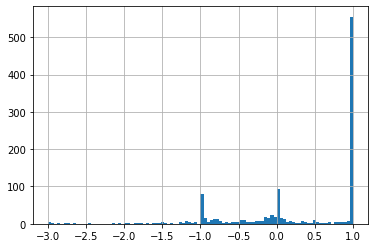

In [252]:
# a value of zero means that they are perfectly aligned.
# Negative values means that the T100 data reported more flights than the flight schedule. This isn't a big issue, but I'll look at some of the larger negative values.
# The positive values indicate that the T100 data is under-reported compared with FS. In particular, a value of 1 indicates that no flights were reported for that airline-month-destination-aircraft combination.
comp.flacc.hist(bins = 100, range = [-3,1])

<AxesSubplot:>

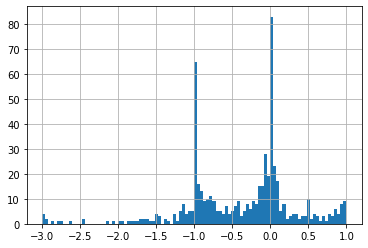

In [253]:
#percentage difference between number of seats in the flight schedule and T100 data
comp['seatacc'] = (comp['Seats'] - comp['SEATS']) / comp['Seats']
comp.seatacc.hist(bins = 100, range = [-3,1])

This histogram actually shows that the under-reported flights in the T100 data actually don't account for a large number of seats. The same histogram for count of flights showed a large peak at 1.0, which indicated that some airlines didn't report certain month-destination-aircraft combinations. However, this histogram shows that that large peak at 1.0 corresponds to a relatively small number of passengers.

We still see a large peak at 0.0 which is what we want. We also still have a peak at -1.0 which indicates over-reporting by exactly double from the flight schedule. Again, this is ultimately not a big concern because we are really just looking for a representative load factor, so as long as there are enough flights reported, we can trust the reported load factor.

In [254]:
# if the accuracy value is greater than 0.5, which means that the T100 data contains less than half of the flights in the flight schedule,
# we should view those records with suspicion. The safer option is to overwrite those rows using aggregated/group averages
# these are the reliable records
rel = comp[comp.flacc < 0.5]
rel.head()

,Operating Airline Code,year,month,Arr Airport Code,ADG,Region,airline_type,Flight No,Seats,CARRIER,YEAR,MONTH,DEST,DEPARTURES_PERFORMED,SEATS,PASSENGERS,flacc,seatacc
0,9E,2021,1,CVG,III,USA-Midwest,TR,16,1216,9E,2021.0,1.0,CVG,16.0,1214.0,459.0,0.000000,0.001645
1,9E,2021,1,DTW,III,USA-Midwest,TR,9,684,9E,2021.0,1.0,DTW,9.0,672.0,411.0,0.000000,0.017544
2,9E,2021,1,MSP,III,USA-Midwest,TR,87,6612,9E,2021.0,1.0,MSP,87.0,6579.0,3195.0,0.000000,0.004991
3,9E,2021,2,CVG,III,USA-Midwest,TR,14,1064,9E,2021.0,2.0,CVG,12.0,912.0,377.0,0.142857,0.142857
4,9E,2021,2,MSP,III,USA-Midwest,TR,78,5928,9E,2021.0,2.0,MSP,73.0,5548.0,2689.0,0.064103,0.064103


In [255]:
# group reliable records by year, month, destination region, ADG, and airline type. 
# This higher-level aggregation will allow us to re-apply the averages to the missing / suspiciously sparse T100 records
rel_x = rel[['year','month','ADG','Region','airline_type','DEPARTURES_PERFORMED','SEATS','PASSENGERS']].groupby(by=['year','month','ADG','Region','airline_type'],as_index=False).sum()
rel_x.head()

,year,month,ADG,Region,airline_type,DEPARTURES_PERFORMED,SEATS,PASSENGERS
0,2021,1,III,Latin America & Caribbean,LC,16.0,2936.0,2041.0
1,2021,1,III,Latin America & Caribbean,TR,17.0,2340.0,621.0
2,2021,1,III,USA-Midwest,LC,2.0,372.0,214.0
3,2021,1,III,USA-Midwest,TR,112.0,8465.0,4065.0
4,2021,1,III,USA-Northeast,LC,18.0,3276.0,1138.0


In [256]:
# create columns for seats per flight, monthly average pax per flight, and average load factor
rel_x['seatsxfl'] = rel_x['SEATS'] / rel_x['DEPARTURES_PERFORMED']
rel_x['paxxfl_mavg'] = rel_x['PASSENGERS'] / rel_x['DEPARTURES_PERFORMED']
rel_x['lf_mavg'] = rel_x['PASSENGERS'] / rel_x['SEATS']
rel_x.head()

,year,month,ADG,Region,airline_type,DEPARTURES_PERFORMED,SEATS,PASSENGERS,seatsxfl,paxxfl_mavg,lf_mavg
0,2021,1,III,Latin America & Caribbean,LC,16.0,2936.0,2041.0,183.500000,127.562500,0.695163
1,2021,1,III,Latin America & Caribbean,TR,17.0,2340.0,621.0,137.647059,36.529412,0.265385
2,2021,1,III,USA-Midwest,LC,2.0,372.0,214.0,186.000000,107.000000,0.575269
3,2021,1,III,USA-Midwest,TR,112.0,8465.0,4065.0,75.580357,36.294643,0.480213
4,2021,1,III,USA-Northeast,LC,18.0,3276.0,1138.0,182.000000,63.222222,0.347375


In [257]:
# create a group ID to make merging easier
rel_x['gid'] = rel_x.year.astype(str) + rel_x.month.astype(str) + rel_x.Region + rel_x.airline_type + rel_x.ADG
rel_x.head()

,year,month,ADG,Region,airline_type,DEPARTURES_PERFORMED,SEATS,PASSENGERS,seatsxfl,paxxfl_mavg,lf_mavg,gid
0,2021,1,III,Latin America & Caribbean,LC,16.0,2936.0,2041.0,183.500000,127.562500,0.695163,20211Latin America & CaribbeanLCIII
1,2021,1,III,Latin America & Caribbean,TR,17.0,2340.0,621.0,137.647059,36.529412,0.265385,20211Latin America & CaribbeanTRIII
2,2021,1,III,USA-Midwest,LC,2.0,372.0,214.0,186.000000,107.000000,0.575269,20211USA-MidwestLCIII
3,2021,1,III,USA-Midwest,TR,112.0,8465.0,4065.0,75.580357,36.294643,0.480213,20211USA-MidwestTRIII
4,2021,1,III,USA-Northeast,LC,18.0,3276.0,1138.0,182.000000,63.222222,0.347375,20211USA-NortheastLCIII


In [258]:
# create a specific ID too
rel['sid'] = rel.year.astype(str) + rel.month.astype(str) + rel.DEST + rel.CARRIER + rel.ADG
rel.head()

,Operating Airline Code,year,month,Arr Airport Code,ADG,Region,airline_type,Flight No,Seats,CARRIER,YEAR,MONTH,DEST,DEPARTURES_PERFORMED,SEATS,PASSENGERS,flacc,seatacc,sid
0,9E,2021,1,CVG,III,USA-Midwest,TR,16,1216,9E,2021.0,1.0,CVG,16.0,1214.0,459.0,0.000000,0.001645,20211CVG9EIII
1,9E,2021,1,DTW,III,USA-Midwest,TR,9,684,9E,2021.0,1.0,DTW,9.0,672.0,411.0,0.000000,0.017544,20211DTW9EIII
2,9E,2021,1,MSP,III,USA-Midwest,TR,87,6612,9E,2021.0,1.0,MSP,87.0,6579.0,3195.0,0.000000,0.004991,20211MSP9EIII
3,9E,2021,2,CVG,III,USA-Midwest,TR,14,1064,9E,2021.0,2.0,CVG,12.0,912.0,377.0,0.142857,0.142857,20212CVG9EIII
4,9E,2021,2,MSP,III,USA-Midwest,TR,78,5928,9E,2021.0,2.0,MSP,73.0,5548.0,2689.0,0.064103,0.064103,20212MSP9EIII


In [259]:
mg['gid'] = mg.year.astype(str) + mg.month.astype(str) + mg.Region + mg.airline_type + mg.ADG
mg['sid'] = mg.year.astype(str) + mg.month.astype(str) + mg['Arr Airport Code'] + mg.airline_iata + mg.ADG

In [260]:
# look through mg dataset to find records that are not in the rel dataset, based on their SPECIFIC criteria. Those are the unreliable records. 
# Then use the grouped reliable records in the rel_x dataset to overwrite the unreliable values.

In [261]:
# merge in the averages of the reliable records
mg = pd.merge(mg,rel_x[['gid','seatsxfl','paxxfl_mavg','lf_mavg']], left_on = 'gid', right_on = 'gid', how='left')
mg.rename({'seatsxfl_y':'seatsxfl_avg',	'paxxfl_mavg_y':'paxxfl_mavg_avg',	'lf_mavg_y':'lf_mavg_avg'},axis=1,inplace=True)

In [262]:
# for the unreliable records, use the average values
mg['SeatsxFl'] = np.where(mg['sid'].isin(rel.sid),mg['seatsxfl_x'],mg['seatsxfl_avg'])
mg['PaxxFl'] = np.where(mg['sid'].isin(rel.sid),mg['paxxfl_mavg_x'],mg['paxxfl_mavg_avg'])
mg['lf'] = np.where(mg['sid'].isin(rel.sid),mg['lf_mavg_x'],mg['lf_mavg_avg'])

In [263]:
# still have some flights without load factor data
#A lot of empty value compared to previous-Alex
mg.lf.isna().sum()

29210

In [264]:
# use annual averages to fill in more of the NAs
for i in mg.index:
    if pd.isnull(mg.loc[i,'lf']):
        y = mg.loc[i,'year']
        r = mg.loc[i,'Region']
        adg = mg.loc[i,'ADG']
        alt = mg.loc[i,'airline_type']
        mg.loc[i,'SeatsxFl'] = mg.loc[(mg.year == y) & (mg.Region == r) & (mg.ADG == adg) & (mg.airline_type == alt),'seatsxfl_x'].mean()
        mg.loc[i,'PaxxFl'] = mg.loc[(mg.year == y) & (mg.Region == r) & (mg.ADG == adg) & (mg.airline_type == alt),'paxxfl_mavg_x'].mean()
        mg.loc[i,'lf'] = mg.loc[(mg.year == y) & (mg.Region == r) & (mg.ADG == adg) & (mg.airline_type == alt),'lf_mavg_x'].mean()

In [407]:
# use annual averages without aircraft group to fill in more of the NAs
for i in mg.index:
    if pd.isnull(mg.loc[i,'lf']):
        y = mg.loc[i,'year']
        r = mg.loc[i,'Region']
#         adg = mg.loc[i,'ADG']
        alt = mg.loc[i,'airline_type']
        mg.loc[i,'SeatsxFl'] = mg.loc[(mg.year == y) & (mg.Region == r) & (mg.airline_type == alt),'seatsxfl_x'].mean()
        mg.loc[i,'PaxxFl'] = mg.loc[(mg.year == y) & (mg.Region == r) & (mg.airline_type == alt),'paxxfl_mavg_x'].mean()
        mg.loc[i,'lf'] = mg.loc[(mg.year == y) & (mg.Region == r) & (mg.airline_type == alt),'lf_mavg_x'].mean()

In [265]:
# use international vs. domestic averages to fill in more NAs
for i in mg.index:
    if pd.isnull(mg.loc[i,'lf']):
        y = mg.loc[i,'year']
        di = mg.loc[i,'International Domestic']
        adg = mg.loc[i,'ADG']
        alt = mg.loc[i,'airline_type']
        mg.loc[i,'SeatsxFl'] = mg.loc[(mg.year == y) & (mg['International Domestic'] == di) & (mg.ADG == adg) & (mg.airline_type == alt),'seatsxfl_x'].mean()
        mg.loc[i,'PaxxFl'] = mg.loc[(mg.year == y) & (mg['International Domestic'] == di) & (mg.ADG == adg) & (mg.airline_type == alt),'paxxfl_mavg_x'].mean()
        mg.loc[i,'lf'] = mg.loc[(mg.year == y) & (mg['International Domestic'] == di) & (mg.ADG == adg) & (mg.airline_type == alt),'lf_mavg_x'].mean()

In [266]:
# use aircraft type averages to fill in more NAs
for i in mg.index:
    if pd.isnull(mg.loc[i,'lf']):
        y = mg.loc[i,'year']
        adg = mg.loc[i,'ADG']
        mg.loc[i,'SeatsxFl'] = mg.loc[(mg.year == y) & (mg.ADG == adg),'seatsxfl_x'].mean()
        mg.loc[i,'PaxxFl'] = mg.loc[(mg.year == y) & (mg.ADG == adg),'paxxfl_mavg_x'].mean()
        mg.loc[i,'lf'] = mg.loc[(mg.year == y) & (mg.ADG == adg),'lf_mavg_x'].mean()

In [267]:
# The remaining missing values are because the T100 data doesn't contain data for any ADG Type VI aircraft, i.e. A380s and Boeing 747-8.
# All of those remaining in the 2021 FS data are Lufthansa flights to Frankfurt on Boeing 747-8s. 
# Upon closer inspection of the T100 data, it appears that Lufthansa reported these scheduled 747-8 flights as A330s, a smaller, type V aircraft, 
# because there are more reported Type V flights in the T100 data than on the flight schedule.
# Regardless, we need to be able to handle Type VI aircraft. According to wikipedia, the passenger capacity of a 747-8 is 467 passengers.
# The only other Type VI aircraft, the A380, is too big to fit in the gates at Newark airport, so no A380s are used.
# Therefore, we will use the 747-8 capacity of 467 as the SeatsxFl field for all Type VI aircraft, and use the load factor of similar Type V aircrafts to determine the PaxxFl.

for i in mg.index:
    if mg.loc[i,'ADG'] == 'VI':

        mg.loc[i,'SeatsxFl'] = 467


        y = mg.loc[i,'year']
        r = mg.loc[i,'Region']
        adg = 'V'
        alt = mg.loc[i,'airline_type']
        mg.loc[i,'lf'] = mg.loc[(mg.year == y) & (mg['Region'] == r) & (mg.ADG == adg) & (mg.airline_type == alt),'lf_mavg_x'].mean()
        mg.loc[i,'PaxxFl'] = mg.loc[i,'lf'] * mg.loc[i,'SeatsxFl']

In [454]:
# finally, all load factors are filled
#There are still 211 empty value-Alex
mg.lf.isna().sum()

0

In [455]:
mg = mg.dropna(subset=['lf'])

## Use FS Seats and T100 reported load factor to calculate total passengers per flight

When I initially wrote this code, I thought that the Seats column in the flight schedule came from the T100 data, but Rohun informed me that it actually is reported directly from the airlines to PANYNJ, which makes it much more reliable than the T100 data. So we will use the reported load factor x actual seats

In [456]:
mg.SeatsxFl.sum()

8849302.841420699

In [457]:
# Check the T100 total seats after merge with the total seats in the FS
mg.Seats.sum()

8871310

This is good - shows that the T100 SeatsxFl, after merging with the flight schedule, is pretty close to the actual total number of seats in the flight schedule.

In [458]:
#create a new column for PAX that is based on the actual seat count and reported load factor
mg['PAX'] = mg.lf * mg.Seats

## Compare the passenger/load factor data with blip data

In [459]:
# first check the distribution of load factors across all scheduled flights in 2021
mg.lf.describe()

count    50369.000000
mean         0.647444
std          0.171778
min          0.052878
25%          0.526617
50%          0.669012
75%          0.798344
max          0.992105
Name: lf, dtype: float64

In [460]:
# looks reasonable, a bit higher than expected. I expected most flights to have load factors between 0.6 and 0.8, but this isn't unrealistic.
#mg.lf.hist(bins=20)

In [461]:
#import TSA bliptrack data
blip = pd.read_excel('BlipTrack 2022.xlsx',skipfooter = 3)
blip.head()

,Date,Military Hour,10 Min Block,PA Airport Code,Terminal Desc,Location Hierarchy - Location Type,Location Hierarchy - Sensor Area,Total People Count
0,2022-01-01,0,30,EWR,EWR-Terminal B,TSA,TB1-TSA,1.0
1,2022-01-01,0,40,EWR,EWR-Terminal B,TSA,TB1-TSA,2.0
2,2022-01-01,0,20,EWR,EWR-Terminal B,TSA,TB2-TSA,1.0
3,2022-01-01,0,40,EWR,EWR-Terminal B,TSA,TB2-TSA,3.0
4,2022-01-01,0,50,EWR,EWR-Terminal B,TSA,TB2-TSA,2.0


In [462]:
blip.Date = pd.to_datetime(blip.Date)

In [463]:
blip.rename({'Location Hierarchy - Sensor Area':'Concourse'},axis = 1, inplace=True)
blip['Concourse'].value_counts()

TB3-TSA    24213
TB2-TSA    22121
TB1-TSA    21218
Name: Concourse, dtype: int64

In [507]:
tsa_21 = pd.read_csv('TSA CUSP Export.csv',skipfooter=3)

In [508]:
tsa_22 = pd.read_excel('TSA 2022.xlsx',skipfooter=3)

In [512]:
tsa_21.head()

,Date,Military Hour,PA Airport Code,Terminal,Checkpoint,Act Pax Hourly
0,1/1/2021,0,EWR,Terminal B,Terminal B/3,3
1,1/1/2021,1,EWR,Terminal B,Terminal B/3,0
2,1/1/2021,2,EWR,Terminal B,Terminal B/3,0
3,1/1/2021,3,EWR,Terminal B,Terminal B/3,1
4,1/1/2021,4,EWR,Terminal B,Terminal B/1,264


In [513]:
tsa_22.head()

,Date,Military Hour,PA Airport Code,Terminal,Checkpoint,Actual Pax
0,2022-01-01,0,EWR,Terminal B,TB-CKPT-3,25
1,2022-01-01,1,EWR,Terminal B,TB-CKPT-3,19
2,2022-01-01,2,EWR,Terminal B,TB-CKPT-3,20
3,2022-01-01,3,EWR,Terminal B,TB-CKPT-1,114
4,2022-01-01,3,EWR,Terminal B,TB-CKPT-2,107


In [518]:
lstt = []
for s in tsa_21['Checkpoint']:
    num = int(s.split('/')[1])
    if num == 1:
        lstt.append('TB-CKPT-1')
    elif num ==2:
        lstt.append('TB-CKPT-2')
    else:
        lstt.append('TB-CKPT-3')

In [520]:
tsa_21['Actual Pax'] = tsa_21['Act Pax Hourly']

In [521]:
tsa_21['Checkpoint'] = lstt

In [522]:
tsa_21 = tsa_21.drop(columns=['Act Pax Hourly'])

In [523]:
tsa = pd.concat([tsa_21,tsa_22])

In [524]:
#tsa = pd.read_excel('TSA 2022.xlsx',skipfooter=3)
tsa.head()

,Date,Military Hour,PA Airport Code,Terminal,Checkpoint,Actual Pax
0,1/1/2021,0,EWR,Terminal B,TB-CKPT-3,3
1,1/1/2021,1,EWR,Terminal B,TB-CKPT-3,0
2,1/1/2021,2,EWR,Terminal B,TB-CKPT-3,0
3,1/1/2021,3,EWR,Terminal B,TB-CKPT-3,1
4,1/1/2021,4,EWR,Terminal B,TB-CKPT-1,264


In [526]:
tsa.dtypes

Date               object
Military Hour       int64
PA Airport Code    object
Terminal           object
Checkpoint         object
Actual Pax         object
dtype: object

In [561]:
# recast variables
#Changed column name-notice-Alex
tsa['Actual Pax'] = tsa['Actual Pax'].str.replace(',','')
tsa['Act Pax Hourly'] = pd.to_numeric(tsa['Actual Pax'])
tsa.Date = pd.to_datetime(tsa.Date)

In [562]:
# total number of passengers departing terminal B for 2021 based on flight schedule and load factors
#Number decreases-Alex
mg.PAX.sum()

5791518.48778355

In [564]:
# total number of passengers moving through TSA in 2021 based on bliptrack
blip['Total People Count'].sum()

2181995.0

In [565]:
# total number of passengers moving through TSA in 2021 based on TSA
tsa['Act Pax Hourly'].sum()

2984885.0

In [566]:
# daily passenger counts by concourse based on flight schedule/load factor
pax_dly_fs = mg[['date', 'Departure Concourse','PAX']].pivot_table(values = 'PAX',index='date',columns='Departure Concourse',aggfunc='sum',fill_value=0)
pax_dly_fs['fs_total'] = pax_dly_fs.B1 + pax_dly_fs.B2 + pax_dly_fs.B3
pax_dly_fs

Departure Concourse,B1,B2,B3,fs_total
date,,,,
2021-01-01,3054.237447,305.061377,1122.581414,4481.880237
2021-01-02,3664.998756,305.061377,1794.396253,5764.456385
2021-01-03,3755.420283,48.889948,1370.526850,5174.837081
2021-01-04,3728.351418,48.889948,1143.563126,4920.804492
2021-01-05,3435.445442,48.889948,1287.899366,4772.234757
...,...,...,...,...
2022-11-20,5873.932082,2173.428163,3265.363072,11312.723317
2022-11-21,5914.320544,2076.147389,3379.852323,11370.320256
2022-11-22,5914.320544,1793.332269,2970.223406,10677.876219


In [567]:
pax_dly_blip = blip[['Date','Concourse', 'Total People Count']].pivot_table(values='Total People Count',index='Date',columns='Concourse',aggfunc='sum',fill_value=0)
pax_dly_blip['blip_total'] = pax_dly_blip['TB1-TSA'] + pax_dly_blip['TB2-TSA'] + pax_dly_blip['TB3-TSA']
pax_dly_blip

Concourse,TB1-TSA,TB2-TSA,TB3-TSA,blip_total
Date,,,,
2022-01-01,5228,2164,3610,11002
2022-01-02,6003,2363,3759,12125
2022-01-03,6557,1984,3722,12263
2022-01-04,5963,2042,2960,10965
2022-01-05,4478,1523,2996,8997
2022-01-06,5654,1858,2848,10360
2022-01-07,4509,2015,2787,9311
2022-01-08,4736,2235,2913,9884
2022-01-09,5478,2030,3101,10609


In [568]:
#Changed column names-Alex

In [569]:
pax_dly_tsa = tsa[['Date','Checkpoint', 'Act Pax Hourly']].pivot_table(values='Act Pax Hourly',index='Date',columns='Checkpoint',aggfunc='sum',fill_value=0)
pax_dly_tsa['tsa_total'] = pax_dly_tsa['TB-CKPT-1'] + pax_dly_tsa['TB-CKPT-1'] + pax_dly_tsa['TB-CKPT-1']
#pax_dly_tsa

In [570]:
pax_dly = pd.merge(left=pax_dly_fs,right=pax_dly_blip, how='outer',left_index=True,right_index=True)
pax_dly = pd.merge(left=pax_dly,right=pax_dly_tsa, how='outer',left_index=True,right_index=True)
pax_dly

,B1,B2,B3,fs_total,TB1-TSA,TB2-TSA,TB3-TSA,blip_total,TB-CKPT-1,TB-CKPT-2,TB-CKPT-3,tsa_total
2021-01-01,3054.237447,305.061377,1122.581414,4481.880237,NaN,NaN,NaN,NaN,3373.0,0.0,1172.0,10119.0
2021-01-02,3664.998756,305.061377,1794.396253,5764.456385,NaN,NaN,NaN,NaN,4448.0,0.0,2049.0,13344.0
2021-01-03,3755.420283,48.889948,1370.526850,5174.837081,NaN,NaN,NaN,NaN,4710.0,0.0,1730.0,14130.0
2021-01-04,3728.351418,48.889948,1143.563126,4920.804492,NaN,NaN,NaN,NaN,3956.0,0.0,1209.0,11868.0
2021-01-05,3435.445442,48.889948,1287.899366,4772.234757,NaN,NaN,NaN,NaN,3071.0,0.0,1293.0,9213.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-20,5873.932082,2173.428163,3265.363072,11312.723317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-21,5914.320544,2076.147389,3379.852323,11370.320256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-22,5914.320544,1793.332269,2970.223406,10677.876219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-23,5914.320544,1874.570886,3222.920449,11011.811879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [571]:
pax_dly['month'] = list(pd.Series(pax_dly.index).dt.month)

In [572]:
pax_mly = pax_dly.groupby('month').sum()
pax_mly

,B1,B2,B3,fs_total,TB1-TSA,TB2-TSA,TB3-TSA,blip_total,TB-CKPT-1,TB-CKPT-2,TB-CKPT-3,tsa_total
month,,,,,,,,,,,,
1,205072.422891,43753.998599,80126.316298,328952.737788,146992.0,48893.0,77405.0,273290.0,83062.0,0.0,26372.0,249186.0
2,192028.646917,34693.114267,66265.280449,292987.041634,141375.0,51588.0,70360.0,263323.0,74311.0,0.0,18040.0,222933.0
3,262349.579925,57656.549191,106749.529443,426755.658559,197953.0,76289.0,110099.0,384341.0,126889.0,0.0,34321.0,380667.0
4,267841.604442,84838.251311,106389.618672,459069.474425,203866.0,91431.0,132305.0,427602.0,133580.0,0.0,46552.0,400740.0
5,308720.494366,85076.323541,129707.215389,523504.033295,206978.0,94592.0,157115.0,458685.0,158209.0,0.0,62345.0,474627.0
6,308497.148556,78953.555486,181294.861716,568745.565758,167898.0,76933.0,129923.0,374754.0,155170.0,0.0,108810.0,465510.0
7,327924.154824,103724.428448,197002.193315,628650.776588,0.0,0.0,0.0,0.0,192275.0,31845.0,118455.0,576825.0
8,345153.036761,101950.113011,183026.282741,630129.432513,0.0,0.0,0.0,0.0,176603.0,26915.0,109732.0,529809.0
9,293271.771704,82367.758437,136687.752791,512327.282931,0.0,0.0,0.0,0.0,158645.0,18502.0,80736.0,475935.0


<AxesSubplot:xlabel='month'>

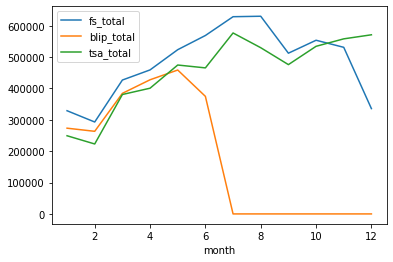

In [589]:
#compare the monthly passenger counts
pax_mly[['fs_total','blip_total', 'tsa_total']].plot()

In [574]:
#pax_mly[['B1','TB1-TSA','Terminal B/1']].plot()

In [575]:
#pax_mly[['B2','TB2-TSA','Terminal B/2']].plot()

In [576]:
#pax_mly[['B3','TB3-TSA','Terminal B/3']].plot()

In [577]:
#daily passenger counts
#pax_dly[['fs_total','blip_total','tsa_total']].plot()

In [578]:
#pax_dly[['B1','TB1-TSA','Terminal B/1']].plot()

In [579]:
#pax_dly[['B2','TB2-TSA','Terminal B/2']].plot()

In [580]:
#pax_dly[['B3','TB3-TSA','Terminal B/3']].plot()

In [581]:
#distribution of the differences between daily bliptrack and fs counts.
#(pax_dly['blip_total'] - pax_dly['fs_total']).hist()

In [582]:
#distribution of the differences between daily tsa and fs counts.
#(pax_dly['tsa_total'] - pax_dly['fs_total']).hist()

<AxesSubplot:>

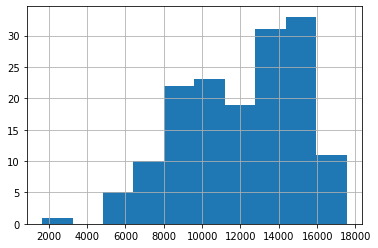

In [590]:
#distribution of the differences between daily bliptrack and tsa counts.
(pax_dly['blip_total'] - pax_dly['tsa_total']).hist()

General conclusion- the TSA and BlipTrack data are pretty consistent with one another, but I think the TSA data looks more realistic for a couple reasons: 1) In B1, the BlipTrack data drops pretty significantly in April 2021, which is right when people are getting vaccinated; 2) there are HUGE swings in the BlipTrack daily data in Concourse B1 in September-December 2021, in some cases dropping to nearly zero passengers per day, which seems unrealistic.

As for the FS data, it is definitely under-counting but follows the trend of TSA and Bliptrack data pretty well.

For the purposes of training a model, we want to make sure that the flight-level estimates are in alignment with the TSA data, so we will calculate a daily ratio of TSA passengers by concourse : FS passengers by concourse, and multiply the flight-level passenger counts by that ratio for each given day.

In [584]:
#Notice changed in column name

In [585]:
pax_dly['B1_factor'] = pax_dly['TB-CKPT-1'] / pax_dly['B1']
pax_dly['B2_factor'] = pax_dly['TB-CKPT-1'] / pax_dly['B2']
pax_dly['B3_factor'] = pax_dly['TB-CKPT-1'] / pax_dly['B3']

In [586]:
pax_dly['date'] = pax_dly.index.copy().date

In [587]:
#merge the factors back into the flight schedule data based on date and concourse
mg = pd.merge(mg, pax_dly[['date','B1_factor','B2_factor','B3_factor']], how='left',left_on ='date', right_on='date')

In [591]:
mg.head(3)

,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG,iata_code,Region,airline_iata,airline_icao,airline_type,total_doses,CARRIER,DEST,YEAR,MONTH,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,CARRIER_NAME,DEST_CITY_NAME,DEST_COUNTRY_NAME,seatsxfl_x,paxxfl_mavg_x,lf_mavg_x,_merge,gid,sid,seatsxfl_avg,paxxfl_mavg_avg,lf_mavg_avg,SeatsxFl,PaxxFl,lf,PAX,B1_factor_x,B2_factor_x,B3_factor_x,PAX_adj,LF_adj,quarter,Year-Quarter_x,InternationalDomestic_x,bus_percent_x,PAX_bus,PAX_lei,B1_factor_y,B2_factor_y,B3_factor_y,B1_factor_x,B2_factor_x,B3_factor_x,Year-Quarter_y,InternationalDomestic_y,bus_percent_y,B1_factor_y,B2_factor_y,B3_factor_y
0,6397,32B,3750,NKS,SJU,B,1035,Domestic,1608,256,NK,Spirit Airlines,3750,1900-01-01T00:59:00.000Z,B3,2021-01-01,2021-01-01,00:59,2021-01-01 00:59:00,0,228,1,2021,Overnight,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,32B,III,SJU,Latin America & Caribbean,NK,NKS,LC,4438527.0,NK,SJU,2021.0,1.0,10.0,1820.0,1632.0,1608.0,Spirit Air Lines,"San Juan, PR",United States,182.0,163.200000,0.896703,both,20211Latin America & CaribbeanLCIII,20211SJUNKIII,183.500000,127.562500,0.695163,182.000000,163.200000,0.896703,204.448352,NaN,NaN,NaN,0,NaN,2021Q1,2021Q1,Domestic,0.152778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021Q1,Domestic,0.152778,1.104367,11.056791,3.004682
1,6389,221,1486,DAL,DTW,B,1646,Domestic,488,117,DL,Delta Air Lines,1486,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,109,1,2021,Morning,4,Friday,1,AIRBUS INDUSTRIE A220-100,Airbus Industrie A330-300,687,BCS1,221,III,DTW,USA-Midwest,DL,DAL,TR,4438527.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,20211USA-MidwestTRIII,20211DTWDLIII,75.580357,36.294643,0.480213,75.580357,36.294643,0.480213,52.343178,NaN,NaN,NaN,0,NaN,2021Q1,2021Q1,Domestic,0.152778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021Q1,Domestic,0.152778,1.104367,11.056791,3.004682
2,6397,32B,3750,NKS,FLL,B,521,Domestic,1065,188,NK,Spirit Airlines,3750,1900-01-01T06:00:00.000Z,B1,2021-01-01,2021-01-01,06:00,2021-01-01 06:00:00,6,228,1,2021,Morning,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,32B,III,FLL,USA-Southeast,NK,NKS,LC,4438527.0,NK,FLL,2021.0,1.0,47.0,8554.0,6111.0,1065.0,Spirit Air Lines,"Fort Lauderdale, FL",United States,182.0,130.021277,0.714403,both,20211USA-SoutheastLCIII,20211FLLNKIII,182.327485,108.111111,0.592950,182.327485,108.111111,0.592950,135.192636,NaN,NaN,NaN,0,NaN,2021Q1,2021Q1,Domestic,0.152778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021Q1,Domestic,0.152778,1.104367,11.056791,3.004682


In [588]:
#calculate adjusted passengers per flight and load factor
mg['PAX_adj'] = 0

for i in mg.index:
    if mg.loc[i,'Departure Concourse'] == 'B1':
        mg.loc[i,'PAX_adj'] = mg.loc[i,'PAX'] * mg.loc[i,'B1_factor']
    elif mg.loc[i,'Departure Concourse'] == 'B2':
        mg.loc[i,'PAX_adj'] = mg.loc[i,'PAX'] * mg.loc[i,'B2_factor']
    else:
        mg.loc[i,'PAX_adj'] = mg.loc[i,'PAX'] * mg.loc[i,'B3_factor']

mg['LF_adj'] = mg['PAX_adj'] / mg['SeatsxFl']

KeyError: 'B3_factor'

In [ ]:
# this does result in about 30% of flights having load factors above 1, but there is no way to avoid it given the number of seats and the total passenger counts
mg['LF_adj'].describe()

In [ ]:
# Indeed, the total number of passengers per the flight schedule now matches the total TSA passengers!
mg['PAX_adj'].sum()

In [ ]:
tsa['Act Pax Hourly'].sum()

In [ ]:
adjpax_dly_fs = mg[['date', 'Departure Concourse','PAX_adj']].pivot_table(values = 'PAX_adj',index='date',columns='Departure Concourse',aggfunc='sum',fill_value=0)
adjpax_dly_fs['fs_total'] = adjpax_dly_fs.B1 + adjpax_dly_fs.B2 + adjpax_dly_fs.B3

In [ ]:
# Also matches by date and concourse.
#adjpax_dly_fs['fs_total'].plot()
#pax_dly_tsa['tsa_total'].plot()

## Add Business/leisure pax ratios

In [592]:
pax_survey=pd.read_excel('data-19.xlsx',skipfooter=3)
pax_survey.head()

,Year-Quarter,Traffic Type Desc,Reason Code,Survey Count
0,2017Q4,Domestic,Business,15
1,2017Q4,Domestic,Leisure,17
2,2017Q4,Domestic,Other,8
3,2017Q4,International,Business,11
4,2017Q4,International,Leisure,32


In [593]:
pax_survey = pax_survey.pivot(index=['Year-Quarter','Traffic Type Desc'],columns = 'Reason Code').reset_index()
pax_survey = pax_survey.droplevel(level=0, axis=1)
pax_survey.columns = ['Year-Quarter', 'InternationalDomestic', 'Business', 'Leisure', 'Other']
pax_survey.head()

,Year-Quarter,InternationalDomestic,Business,Leisure,Other
0,2017Q4,Domestic,15,17,8
1,2017Q4,International,11,32,10
2,2018Q1,Domestic,9,28,5
3,2018Q1,International,18,53,8
4,2018Q2,Domestic,7,29,12


In [ ]:
#Create ratio of business pax to total pax
pax_survey['bus_percent'] = pax_survey['Business'] / (pax_survey['Business'] + pax_survey['Leisure'] + pax_survey['Other'])

In [ ]:
pax_survey.head()

In [ ]:
# create a new column in the merged data for quarter
mg['quarter'] = mg.DT_sched.dt.to_period('Q').astype(str)

In [ ]:
mg.head(2)

In [ ]:
mg = pd.merge(mg, pax_survey[['Year-Quarter','InternationalDomestic','bus_percent']],how='left',left_on=['quarter','International Domestic'], right_on = ['Year-Quarter','InternationalDomestic'])

In [ ]:
mg.loc[mg.bus_percent.isna(),'bus_percent'] = mg.loc[mg.DT_sched == (np.max(mg.loc[~mg.bus_percent.isna(),'DT_sched'])),'bus_percent']

In [ ]:
mg['PAX_bus'] = mg['PAX_adj'] * mg['bus_percent']
mg['PAX_lei'] = mg['PAX_adj'] - mg['PAX_bus']

In [ ]:
#mg.bus_percent.hist()

## Clean up the mg dataset, leaving only the fields to use for modeling

In [ ]:
mg.head(2)

In [ ]:
df = mg[[
       'DT_sched','Flight No','iata_code', 
       'Region','International Domestic', 'Flight Distance', 'Flight Duration',
       'Operating Airline Name','airline_iata', 'airline_icao', 'airline_type',
        'Departure Concourse',
       'date', 'Time', 'Hour', 'month', 'year', 'Time Category',
       'DOW', 'DOW_l', 'holiday','total_doses', 'BTS Aircraft Type Desc_1',
       'ICAO Aircraft Code', 'IATA Aircraft Code', 'ADG',
        'Seats', 'LF_adj', 'PAX_adj', 'PAX_bus','PAX_lei']]

In [ ]:
df.head(2)

In [ ]:
df.ADG.value_counts()

In [ ]:
# One hot encoding for categorical variables: Region, airline_type, Time Category, DOW, ADG
df['airline_type_dum'] = df['airline_type'].replace({'TR':0,'LC':1})
df['domintl_dum'] = df['International Domestic'].replace({'Domestic':0,'International':1})
df['region'] = df['Region'].copy()
df = pd.get_dummies(df,columns = ['Region','domintl_dum','Time Category','DOW','ADG'])
df['Month'] = df['month'].copy()
df = pd.get_dummies(df,columns = ['airline_iata','month','Hour']) # let's also do it for some of the more specific categorical variables
df.head(2)

In [ ]:
df.shape

In [ ]:
train = df[df['Month'] < 10]
val = df[(df['Month'] == 10) | (df['Month'] == 11)]
test = df[df['Month'] == 12]

In [ ]:
#Skipped this part-creating train/test dataset

In [ ]:
#Standard scaler for numeric data
from sklearn.preprocessing import StandardScaler

In [ ]:
#train.head(2)

In [ ]:
#fit the StandardScaler on the training data, transform all data
#ss = StandardScaler()
#ss.fit(train[['Flight Distance','total_doses']])
#train[['distance_sc','total_doses_sc']] = ss.transform(train[['Flight Distance','total_doses']])
#val[['distance_sc','total_doses_sc']] = ss.transform(val[['Flight Distance','total_doses']])
#test[['distance_sc','total_doses_sc']] = ss.transform(test[['Flight Distance','total_doses']])

In [ ]:
#X_train=train[['airline_type_dum',
 #      'Region_Africa', 'Region_Asia', 'Region_Canada', 'Region_Europe',
#       'Region_Latin America & Caribbean', 'Region_USA-Midwest',
  #     'Region_USA-Northeast', 'Region_USA-Pacific West', 'Region_USA-Plains',
   #    'Region_USA-Southeast', 'Time Category_Afternoon',
    #   'Time Category_Evening', 'Time Category_Morning',
     #  'Time Category_Overnight', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4',
      # 'DOW_5', 'DOW_6', 'distance_sc', 
       #'holiday','total_doses_sc']]
#y_train=train['PAX_adj']

In [ ]:
#X_val=val[['airline_type_dum',
 #      'Region_Africa', 'Region_Asia', 'Region_Canada', 'Region_Europe',
  #     'Region_Latin America & Caribbean', 'Region_USA-Midwest',
   #    'Region_USA-Northeast', 'Region_USA-Pacific West', 'Region_USA-Plains',
    #   'Region_USA-Southeast', 'Time Category_Afternoon',
     #  'Time Category_Evening', 'Time Category_Morning',
      # 'Time Category_Overnight', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4',
       #'DOW_5', 'DOW_6', 'distance_sc', 
       #'holiday','total_doses_sc']]
#y_val=val['PAX_adj']

In [ ]:
#X_test=test[['airline_type_dum',
#       'Region_Africa', 'Region_Asia', 'Region_Canada', 'Region_Europe',
 #      'Region_Latin America & Caribbean', 'Region_USA-Midwest',
  #     'Region_USA-Northeast', 'Region_USA-Pacific West', 'Region_USA-Plains',
   #    'Region_USA-Southeast', 'Time Category_Afternoon',
    #   'Time Category_Evening', 'Time Category_Morning',
     #  'Time Category_Overnight', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4',
      # 'DOW_5', 'DOW_6', 'distance_sc', 
       #'holiday','total_doses_sc']]
#y_test=test['PAX_adj']

In [ ]:
# These are training datasets with expanded variable categories (e.g. 24 hours vs. 4 time categories)
#X_train_exp=train.drop(['DT_sched', 'Flight No', 'iata_code', 'International Domestic','Flight Duration', 'Operating Airline Name',
 #      'airline_icao', 'airline_type', 'Departure Concourse','year', 'DOW_l', 'BTS Aircraft Type Desc_1', 'ICAO Aircraft Code',
  #     'IATA Aircraft Code', 'Seats', 'PAX_adj', 'LF_adj', 'date', 'Month','Time', 'total_doses','Flight Distance'],axis=1)

#X_val_exp=val.drop(['DT_sched', 'Flight No', 'iata_code', 'International Domestic','Flight Duration', 'Operating Airline Name',
   #    'airline_icao', 'airline_type', 'Departure Concourse','year', 'DOW_l', 'BTS Aircraft Type Desc_1', 'ICAO Aircraft Code',
    #   'IATA Aircraft Code', 'Seats', 'PAX_adj', 'LF_adj', 'date', 'Month','Time', 'total_doses','Flight Distance'],axis=1)

#X_test_exp=test.drop(['DT_sched', 'Flight No', 'iata_code', 'International Domestic','Flight Duration', 'Operating Airline Name',
     #  'airline_icao', 'airline_type', 'Departure Concourse','year', 'DOW_l', 'BTS Aircraft Type Desc_1', 'ICAO Aircraft Code',
      # 'IATA Aircraft Code', 'Seats', 'PAX_adj', 'LF_adj', 'date', 'Month','Time', 'total_doses','Flight Distance'],axis=1)

In [ ]:
# Can I do a random train-test split instead of by month?
# Can I use cross-validation with random folds for the flight schedule and combine my train+test data?
# The flight schedule isn't exactly time series data, but it is true that flights in October are more likely to be similar to each other than flights in March, for example.

In [ ]:
# Group the dataset by 10-minute increments and make a true time series. This can be shared with Yuki and used for my own modeling.
# Group the passenger counts by business/leisure, international/domestic, traditional/budget.
# Also include the count of flights / total number of seats for each 10-minute interval, by concourse, destination region, and airline type
# Include the time-based variables too - holiday, time of day, day of week, vaccine count
# Create lags in 30-minute increments

## Transform into time-series dataset

In [ ]:
#Create a dataframe with 10-minute interval index for 2021
ts = pd.DataFrame(data = 0,index=pd.date_range(start='1/1/2021',end='2022-11-24 23:50:00',freq='10Min'),columns = ['date'])
ts['date'] = list(pd.Series(ts.index).dt.date)
ts['dow'] = list(pd.Series(ts.index).dt.weekday)
ts['hour'] = list(pd.Series(ts.index).dt.hour)
ts.head()

In [ ]:
# merge covid vaccine numbers
ts = pd.merge(ts, vax[['date','total_doses']], how= 'left', left_on = 'date', right_on = 'date').set_axis(ts.index)

In [ ]:
ts.head()

In [ ]:
#if the departure date is in the list of holidays, mark as a 1 or if the departure date is in the list of days surrounding holidays, also mark as a 1
ts['holiday'] = 0
for i in ts.index:
    if ts.loc[i,'date'] in hds:
        ts.loc[i,'holiday'] = 1
    elif ts.loc[i,'date'] in fl_hds:
        ts.loc[i,'holiday'] = 1

In [ ]:
# time categories
lsthour = []
for s in ts['hour']:
        if s in morning:
            lsthour.append('Morning')
        elif s in afternoon:
            lsthour.append('Afternoon')
        elif s in evening:
            lsthour.append('Evening')
        elif s in overnight:
            lsthour.append('Overnight')

ts['tod'] = lsthour

In [ ]:
#encode categorical variables
ts.drop('hour',axis=1,inplace=True)
ts = pd.get_dummies(ts,columns=['dow','tod'])
ts.head()

In [ ]:
#group the flight schedule into 10-minute intervals
df2 = df[['DT_sched','Flight No', 'International Domestic','region','airline_type', 'Departure Concourse','Seats','PAX_adj','PAX_bus','PAX_lei']].groupby([
    pd.Grouper(key='DT_sched', freq='10Min'),'International Domestic','region','airline_type','Departure Concourse']).agg({
    'Flight No':'count','Seats':'sum','PAX_adj':'sum','PAX_bus':'sum','PAX_lei':'sum'}).reset_index()
df2.head()

In [ ]:
# re-pivot so that all values are continuous variables
df2p = df2.pivot_table(index='DT_sched',columns = ['International Domestic','region','airline_type','Departure Concourse'],dropna=False,aggfunc='sum').fillna(0)
df2p.head()

In [ ]:
#Group some columns into more useful features for modeling

df2p['seats_tr'] = df2p.loc(axis=1)['Seats',:,:,'TR'].sum(axis=1)
df2p['seats_lc'] = df2p.loc(axis=1)['Seats',:,:,'LC'].sum(axis=1)

df2p['seats_lc_afr'] = df2p.loc(axis=1)['Seats',:,'Africa','LC'].sum(axis=1)
df2p['seats_lc_asi'] = df2p.loc(axis=1)['Seats',:,'Asia','LC'].sum(axis=1)
df2p['seats_lc_can'] = df2p.loc(axis=1)['Seats',:,'Canada','LC'].sum(axis=1)
df2p['seats_lc_eur'] = df2p.loc(axis=1)['Seats',:,'Europe','LC'].sum(axis=1)
df2p['seats_lc_lac'] = df2p.loc(axis=1)['Seats',:,'Latin America & Caribbean','LC'].sum(axis=1)
df2p['seats_lc_midwest'] = df2p.loc(axis=1)['Seats',:,'USA-Midwest','LC'].sum(axis=1)
df2p['seats_lc_northeast'] = df2p.loc(axis=1)['Seats',:,'USA-Northeast','LC'].sum(axis=1)
df2p['seats_lc_west'] = df2p.loc(axis=1)['Seats',:,'USA-Pacific West','LC'].sum(axis=1)
df2p['seats_lc_plains'] = df2p.loc(axis=1)['Seats',:,'USA-Plains','LC'].sum(axis=1)
df2p['seats_lc_southeast'] = df2p.loc(axis=1)['Seats',:,'USA-Southeast','LC'].sum(axis=1)

df2p['seats_tr_afr'] = df2p.loc(axis=1)['Seats',:,'Africa','TR'].sum(axis=1)
df2p['seats_tr_asi'] = df2p.loc(axis=1)['Seats',:,'Asia','TR'].sum(axis=1)
df2p['seats_tr_can'] = df2p.loc(axis=1)['Seats',:,'Canada','TR'].sum(axis=1)
df2p['seats_tr_eur'] = df2p.loc(axis=1)['Seats',:,'Europe','TR'].sum(axis=1)
df2p['seats_tr_lac'] = df2p.loc(axis=1)['Seats',:,'Latin America & Caribbean','TR'].sum(axis=1)
df2p['seats_tr_midwest'] = df2p.loc(axis=1)['Seats',:,'USA-Midwest','TR'].sum(axis=1)
df2p['seats_tr_northeast'] = df2p.loc(axis=1)['Seats',:,'USA-Northeast','TR'].sum(axis=1)
df2p['seats_tr_west'] = df2p.loc(axis=1)['Seats',:,'USA-Pacific West','TR'].sum(axis=1)
df2p['seats_tr_plains'] = df2p.loc(axis=1)['Seats',:,'USA-Plains','TR'].sum(axis=1)
df2p['seats_tr_southeast'] = df2p.loc(axis=1)['Seats',:,'USA-Southeast','TR'].sum(axis=1)



df2p['pax_intl_bus'] = df2p.loc(axis=1)['PAX_bus','International'].sum(axis=1)
df2p['pax_intl_lei'] = df2p.loc(axis=1)['PAX_lei','International'].sum(axis=1)
df2p['pax_dom_bus'] = df2p.loc(axis=1)['PAX_bus','Domestic'].sum(axis=1)
df2p['pax_dom_lei'] = df2p.loc(axis=1)['PAX_lei','Domestic'].sum(axis=1)

df2p['pax_B1_dom'] = df2p.loc(axis=1)['PAX_adj','Domestic',:,:,'B1'].sum(axis=1)
df2p['pax_B2_dom'] = df2p.loc(axis=1)['PAX_adj','Domestic',:,:,'B2'].sum(axis=1)
df2p['pax_B3_dom'] = df2p.loc(axis=1)['PAX_adj','Domestic',:,:,'B3'].sum(axis=1)
df2p['pax_B1_intl'] = df2p.loc(axis=1)['PAX_adj','International',:,:,'B1'].sum(axis=1)
df2p['pax_B2_intl'] = df2p.loc(axis=1)['PAX_adj','International',:,:,'B2'].sum(axis=1)
df2p['pax_B3_intl'] = df2p.loc(axis=1)['PAX_adj','International',:,:,'B3'].sum(axis=1)

In [ ]:
# keep just the relevant features that were just created
df2p2 = df2p.iloc[:,-32:]
df2p2.columns = list(df2p.iloc[:,-32:].columns.droplevel(-1).droplevel(-1).droplevel(-1).droplevel(-1))
df2p2.head()

In [ ]:
df2p2.index

In [ ]:
#df2p2.to_csv('pax_ts_22.csv')

In [ ]:
# merge into the ts dataframe
ts = pd.merge(ts,df2p2,how='left',left_index=True,right_index=True).fillna(0)
ts.head()

In [ ]:
# create 30 lag columns (5 hours) for each of the 10 target variables
lags = range(1, 31)  # lagging 30 ten-minute intervals = 5 hours

ts = ts.assign(**{
    f'{col}__t-{lag*10}': ts[col].shift(lag)
    for lag in lags
    for col in ts.iloc[:,-10:]
})

In [ ]:
ts.shape

In [ ]:
ts['date'].tail()

In [ ]:
#export time series for others to use
#ts.to_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\PANYNJ-codebase\pax_ts.csv')

In [ ]:
ts.to_csv('pax_ts_2122.csv')

In [ ]:
#Stop right here-Alex